# Project work for *02901 Advanced Topics in Machine Learning: Computational Tools for Machine Learning in Python*

We will in this notebook present a reaanalyses of the MA2 process example in * Learning Summary Statistic for Approximate Bayesian Computation via Deep Neural Network* [link to paper](https://www.researchgate.net/publication/282691910_Learning_Summary_Statistic_for_Approximate_Bayesian_Computation_via_Deep_Neural_Network). 

For building and training the deep neural networks we use the PyTorch package. We also use Numpy for implementation of the ABC rejection sampling algorithm. Matplotlib is used for plotting.

Load packages 

In [26]:
%matplotlib inline

import torch
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt


Set ground-truth parameters and load data. 

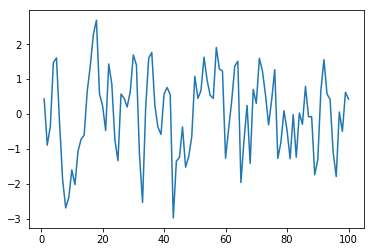

In [27]:
θ_true = np.array([0.6, 0.2]) # ground-truth parameter values 

ma2_data = np.genfromtxt('data/ma2_data.csv', delimiter=',') # load data 
obs_nbrs = ma2_data[:,0]
y_obs = ma2_data[:,1]

# plot data 
plt.plot(y_obs) 


Functions defining the MA2 process. 

In [ ]:

# Sample from the Uniform prior distribution
function sample_from_prior()

  while true
    θ_1 = rand(Uniform(-2,2))
    θ_2 = rand(Uniform(-1,1))
    if θ_2 + θ_1  >= -1 && θ_2 - θ_1 >= -1
      return [θ_1; θ_2]
    end
  end

end

# Evaluate prior distribtuion
function evaluate_prior(Θ::Vector)
  θ_1 = Θ[1]
  θ_2 = Θ[2]
  if abs(θ_1) <= 2 && abs(θ_2) <= 1 && θ_2 + θ_1 >= -1 && θ_2 - θ_1 >= -1
    return 1.
  else
    return 0.
  end
end

# Generate data from the model
function generate_data(Θ::Vector, N_data=100)

  θ_1 = Θ[1]
  θ_2 = Θ[2]

  if abs(θ_1) <= 2 && abs(θ_2) <= 1 && θ_2 + θ_1 >= -1 && θ_2 - θ_1 >= -1

    y = zeros(N_data)
    ϵ = randn(N_data)

    y[1] = ϵ[1]
    y[2] = ϵ[2] + θ_1*y[1]

    @inbounds for i = 3:N_data
      y[i] = ϵ[i] + θ_1*ϵ[i-1] + θ_2*ϵ[i-2]
    end

    return y
  else
    return NaN*ones(N_data)
  end

end
